In [41]:
# uncomment the following line to install the required packages
"""
pip install pandas numpy matplotlib hdbscan umap-learn
"""

'\npip install pandas numpy matplotlib hdbscan umap-learn\n'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import hdbscan
import umap
import json

In [10]:
with open('../data/dataisbeautiful-embeddings.json', 'r') as f:
    metadata = json.load(f)

In [11]:
metadata[0]

{'id': 'hs9mnz', 'model': 'text-embedding-ada-002-v2', 'dimensions': 1536}

In [14]:
with open('../data/dataisbeautiful-embeddings.bin', 'rb') as f:
    embeddings = np.fromfile(f, dtype=np.float64)

In [18]:
embeddings = embeddings.reshape(len(metadata), metadata[0]['dimensions'])

In [20]:
embeddings.shape

(995, 1536)

In [21]:
# reduce dimensionality with umap
reducer = umap.UMAP(
    n_neighbors=25,
    min_dist=0.05,
    metric='cosine',
    random_state=42,
    n_components=2,
    verbose=True
)

In [22]:
embedding = reducer.fit_transform(embeddings)

UMAP(angular_rp_forest=True, metric='cosine', min_dist=0.05, n_neighbors=25, random_state=42, verbose=True)
Sun Apr 16 23:58:25 2023 Construct fuzzy simplicial set


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Sun Apr 16 23:58:26 2023 Finding Nearest Neighbors
Sun Apr 16 23:58:27 2023 Finished Nearest Neighbor Search
Sun Apr 16 23:58:28 2023 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Sun Apr 16 23:58:29 2023 Finished embedding


In [23]:
embedding.shape

(995, 2)

/var/folders/sx/rrvr6l_d5x1_g46jxlx5ypfc0000gn/T/ipykernel_42495/2305409010.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding[:, 0], embedding[:, 1], s=3, cmap='Spectral')


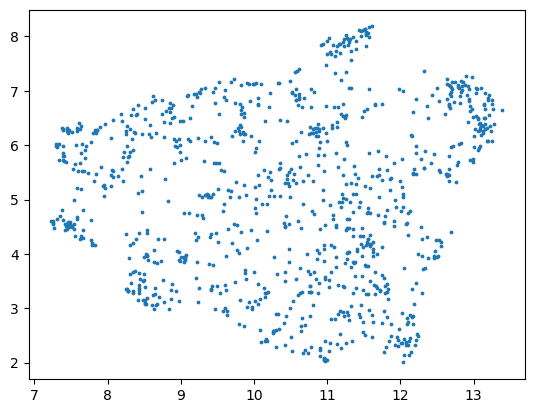

In [24]:
# plot embedding
plt.scatter(embedding[:, 0], embedding[:, 1], s=3, cmap='Spectral')
plt.show()

In [27]:
#write embedding to csv file with header x,y
np.savetxt("../data/dataisbeautiful-umap.csv", embedding, delimiter=",", header="x,y", comments='')

In [28]:
# Create an HDBSCAN instance with custom parameters
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=5)



In [29]:
# Fit the model to your dataset
clusterer.fit(embedding)

HDBSCAN(min_samples=5)

In [31]:
np.unique(clusterer.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43])

In [32]:
# write clusterer.labels_ to a csv file
np.savetxt("../data/dataisbeautiful-hdbscan.csv", clusterer.labels_, delimiter=",", header="cluster", comments="")

In [33]:
# read in the posts json as a pandas dataframe
data = pd.read_json('../data/dataisbeautiful-posts.json')

In [34]:
# add the cluster labels to the dataframe
data['cluster'] = clusterer.labels_

In [44]:
# group by cluster and concat the titles
cluster_extract = data.groupby('cluster')['title'].apply(lambda x: '\n*'.join(x)).reset_index()

In [45]:
# rename the title column of cluster_titles to summary
cluster_extract.rename(columns={'title': 'extract'}, inplace=True)

In [46]:
# save the cluster titles to a csv file
cluster_extract.to_csv('../data/dataisbeautiful-cluster-extract.csv', index=False)